# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [2]:
#import the libraries
import pandas as pd, numpy as np

In [3]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field

inp1 = inp0[-inp0.Rating.isnull()]
#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [9]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [11]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
#Drop the row having shifted values
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]
#inp1.loc[10472,:]

#Check the nulls againin Android version column to cross-verify
#inp1[(inp1['Android Ver'].isnull() & (inp1.Category=="1.9"))]

inp1[inp1 ['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [13]:
#Check the most common value in the Android version column
inp1['Android Ver'].value_counts()


4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [14]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'].mode()[0]
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [15]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [16]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [17]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [18]:
#Replace the nulls in the Current version column with the above value
inp1['Current Ver']= inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
inp1['Current Ver'].isnull().sum()

0

In [19]:
# Question : Check the most common value in the Current version column again
inp1['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

#### Handling Incorrect Data Types 

In [20]:
#Check the datatypes of all the columns 
inp1.dtypes
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
#Analyse the Price column to check the issue
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [23]:
#Write the function to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))


In [24]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [25]:
#Analyse the Reviews column
inp1.Reviews.value_counts

<bound method IndexOpsMixin.value_counts of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: object>

In [26]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")



#Check the quantitative spread of this dataframe
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [27]:
#Analyse the Installs Column

inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1["Installs"]=inp1["Installs"].replace({"\+":""},regex=True)

inp1["Installs"]=inp1["Installs"].replace({"\,":""},regex=True)
inp1["Installs"]=inp1["Installs"].astype("float")
inp1.Installs.describe()



count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [29]:
#Perform the sanity checks on the Reviews column
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [30]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [31]:
#import the plotting libraries

import matplotlib.pyplot as plt 
%matplotlib inline

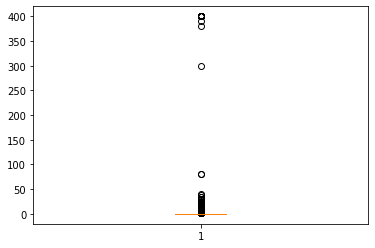

In [32]:
#Create a box plot for the price col
plt.boxplot(inp1.Price)
plt.show()

In [33]:
#Check the apps with price more than 200
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [34]:
#Clean the Price column
inp1 =inp1[inp1.Price < 200]
inp1.Price.describe()

count    9351.000000
mean        0.334744
std         2.169282
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

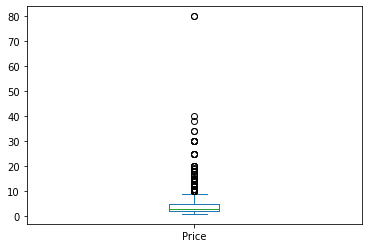

In [35]:
#Create a box plot for paid apps
inp1[inp1.Price>0].Price.plot.box()


In [36]:
#Check the apps with price more than 30
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [37]:
#Clean the Price column again
inp1= inp1[inp1.Price<=30]
inp1.shape

(9345, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

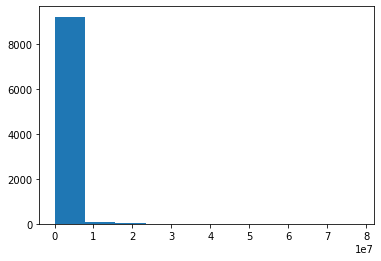

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.

P

In [38]:
#Create a histogram of the Reviews
?plt.hist
plt.hist(inp1.Reviews)
plt.show()

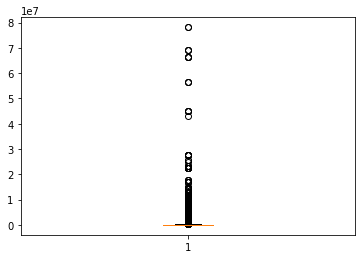

In [39]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1 .Reviews)
plt.show()

In [40]:
#Check records with 1 million reviews
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,1.000000e+08,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,1.000000e+08,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,1.000000e+08,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [41]:
#Drop the above records
inp1= inp1[ inp1.Reviews<=1000000]
inp1.shape


(8641, 13)

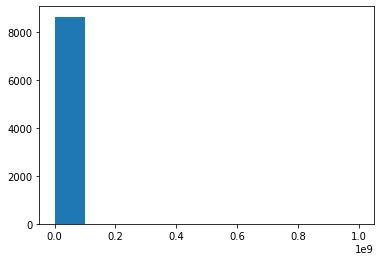

In [42]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1.Installs)
plt.show()

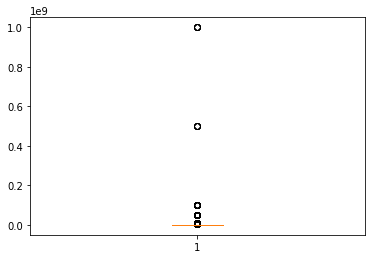

In [43]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
plt.show()


In [44]:
#Question - CLean the Installs by removing all the apps having more than 100 million installs
inp1=inp1[inp1.Installs>=100000000]
inp1.shape

(61, 13)

(array([51.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  5.]),
 array([1.0e+08, 1.9e+08, 2.8e+08, 3.7e+08, 4.6e+08, 5.5e+08, 6.4e+08,
        7.3e+08, 8.2e+08, 9.1e+08, 1.0e+09]),
 <BarContainer object of 10 artists>)

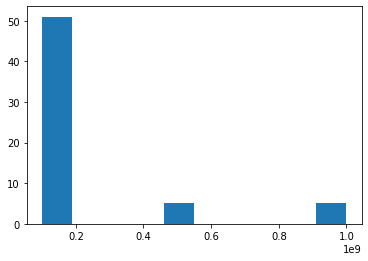

In [45]:
#Plot a histogram for Size as well.
inp1.hist
plt.hist(inp1.Installs)

{'whiskers': [<matplotlib.lines.Line2D at 0x16a32bf3700>,
 'caps': [<matplotlib.lines.Line2D at 0x16a32bf3ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a32bf3430>],
 'medians': [<matplotlib.lines.Line2D at 0x16a32c01280>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a32c01550>],
 'means': []}

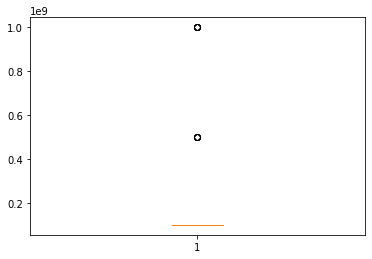

In [46]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1.Installs)

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [47]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

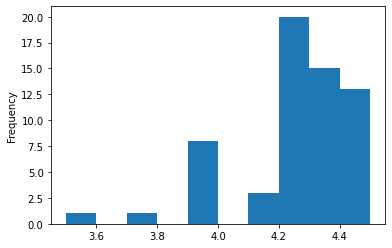

In [48]:
#Create a distribution plot for rating
inp1.Rating.plot.hist()
plt.show()

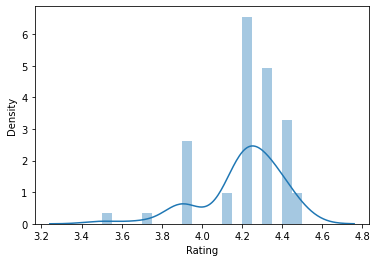

In [49]:
#Change the number of bins
import seaborn as sns
sns.distplot(inp1.Rating)
plt.show()


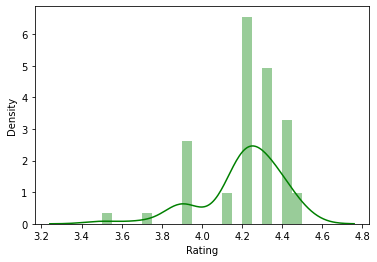

In [50]:
#Change the colour of bins to green
sns.set_color_codes()
x = inp1.Rating
ax = sns.distplot( x, color="green")

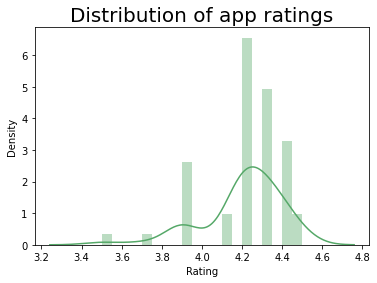

In [51]:
#Apply matplotlib functionalities

sns.distplot(inp1.Rating, color='g', bins=20 ) #title = 'Distribution of app ratings')
plt.title('Distribution of app ratings', fontsize =20)
plt.show()

#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

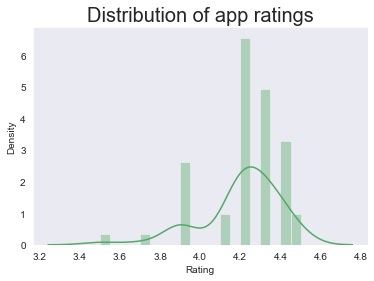

In [52]:
#Check all the styling options
sns.set_style('dark')
sns.distplot(inp1.Rating, color='g', bins=20 ) #title = 'Distribution of app ratings')
plt.title('Distribution of app ratings', fontsize =20)
plt.show()

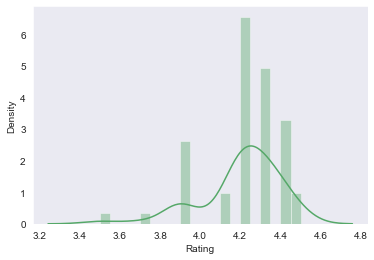

In [53]:
#Change the number of bins to 20
sns.distplot(inp1.Rating, bins=20, color='g')
plt.style.available
plt.style.use('dark_background')
plt.show()





#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [54]:
#Analyse the Content Rating column
inp1['Content Rating'].value_counts()

Everyone        45
Teen            15
Everyone 10+     1
Name: Content Rating, dtype: int64

In [67]:
#Remove the rows with values which are less represented 
inp1[inp1['Content Rating'].isin(['Adults only 18+, Unrated'])

SyntaxError: unexpected EOF while parsing (1345461387.py, line 2)

In [56]:
#Reset the index
inp1.shape

(61, 13)

In [149]:
#Check the apps belonging to different categories of Content Rating 
inp1.reset_index(inplace=True,drop=True)
inp1.info

<bound method DataFrame.info of                                        App             Category  Rating  \
0                            Amazon Kindle  BOOKS_AND_REFERENCE     4.2   
1             imo beta free calls and text        COMMUNICATION     4.3   
2                         Android Messages        COMMUNICATION     4.2   
3                         Android Messages        COMMUNICATION     4.2   
4                         IMDb Movies & TV        ENTERTAINMENT     4.2   
..                                     ...                  ...     ...   
56                             Google Docs         PRODUCTIVITY     4.3   
57                             Google Keep         PRODUCTIVITY     4.4   
58                             Google News   NEWS_AND_MAGAZINES     3.9   
59  File Commander - File Manager/Explorer             BUSINESS     4.3   
60                       Motorola FM Radio        VIDEO_PLAYERS     3.9   

    Reviews          Size      Installs  Type  Price Content Rating

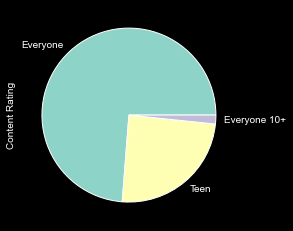

In [62]:
#Plot a pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()


<AxesSubplot:>

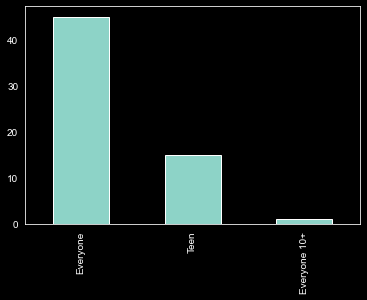

In [63]:
#Plot a bar chart
inp1['Content Rating'].value_counts().plot.bar()

<AxesSubplot:>

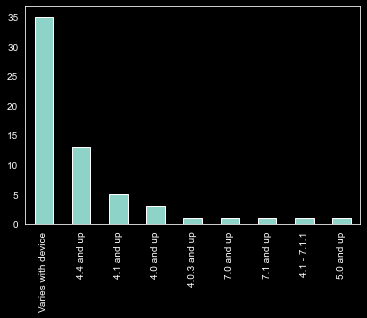

In [66]:
#Question - Plot a bar plot for checking the 4th highest Android version type
inp1['Android Ver'].value_counts().plot.bar()


#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

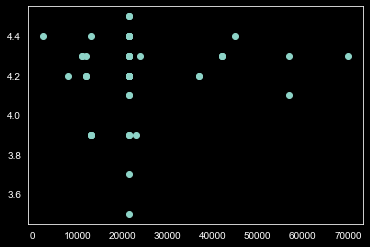

In [68]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

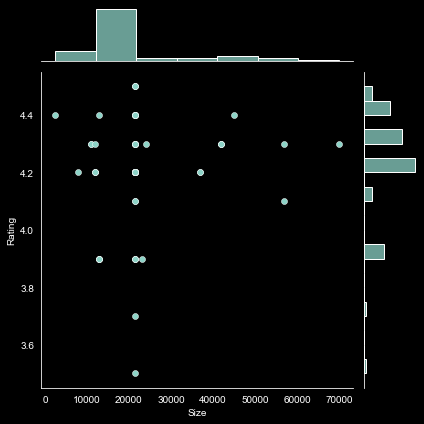

In [72]:
### Plot the same thing
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

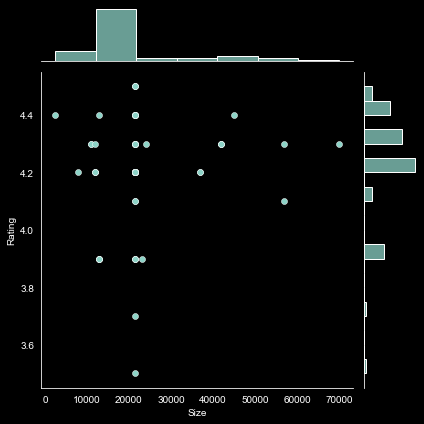

In [73]:
## Plot a jointplot for Price and Rating
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()


**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

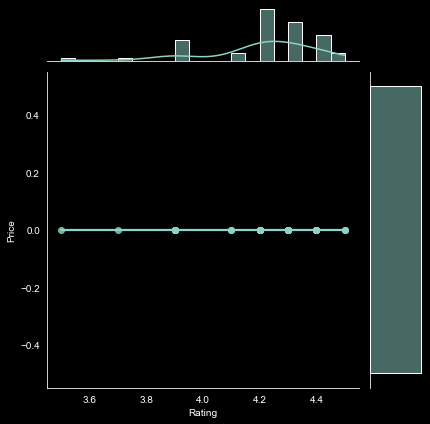

In [83]:
##Plot a reg plot for Price and Rating and observe the trend

sns.jointplot(inp1.Rating,inp1.Price, data=inp1[inp1.Price>0], kind='reg')

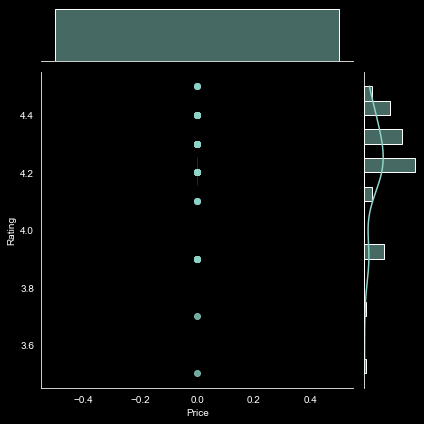

In [91]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(inp1.Price, inp1.Rating, data=inp1[inp1.Price>0], kind='reg')

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

Object `sns.pairplot()` not found.


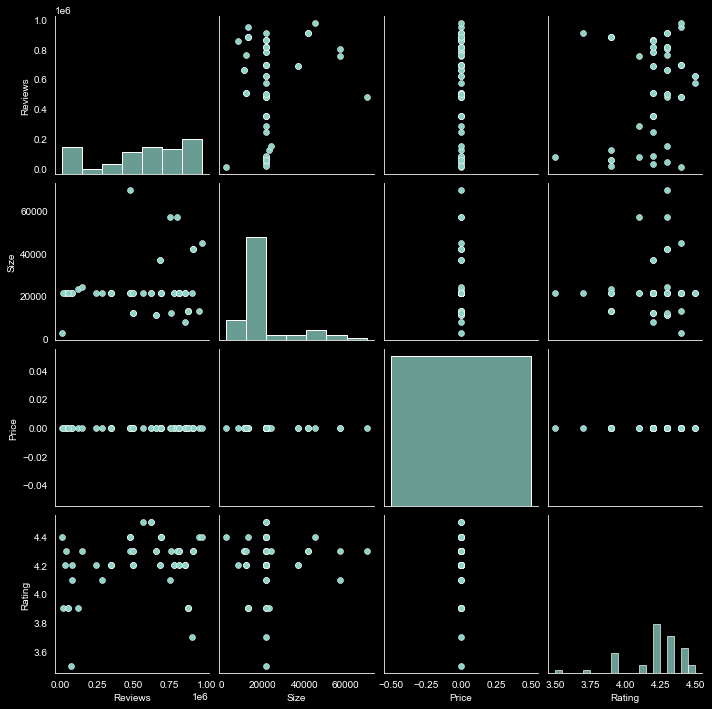

In [88]:
## Create a pair plot for Reviews, Size, Price and Rating

?sns.pairplot()
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<AxesSubplot:xlabel='Content Rating'>

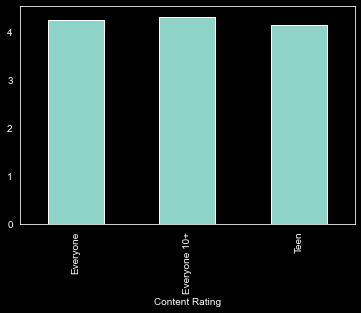

In [93]:
##Plot a bar plot of Content Rating vs Average Rating 
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

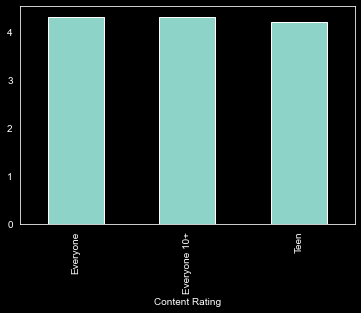

In [94]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

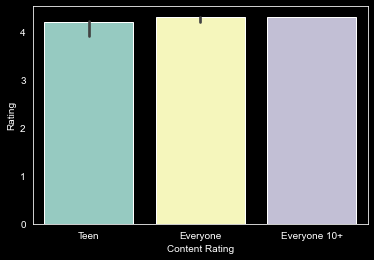

In [97]:
##Plot the above bar plot using the estimator parameter

sns.barplot(data=inp1,x='Content Rating', y='Rating', estimator=np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

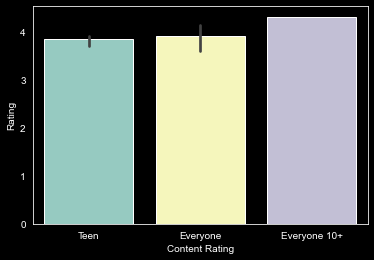

In [99]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot(data=inp1,x='Content Rating', y='Rating', estimator=lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

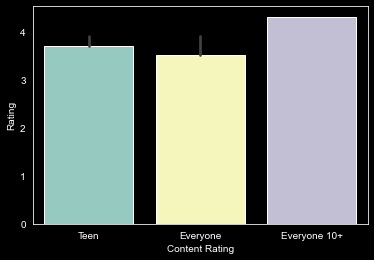

In [100]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(data=inp1, x="Content Rating", y="Rating", estimator = np.min)

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




In [109]:
##Plot a box plot of Rating vs Content Rating
sns.set_theme(style="whitegrid")
inp1 = sns.load_dataset('goolgeplaystore_v2.csv')
ax = sns.boxplot(x=inp1["Rating"], y=inp1['Content Rating'])

ValueError: 'goolgeplaystore_v2.csv' is not one of the example datasets.

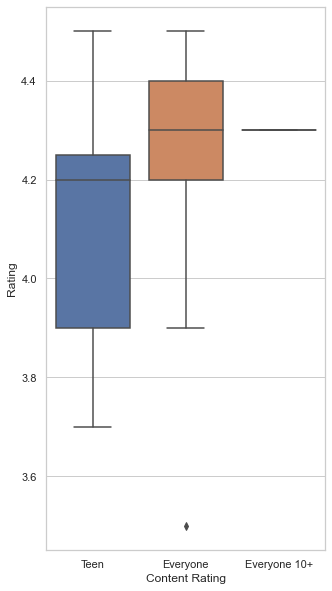

In [117]:
##Question - Plot a box plot for the Rating column only
plt.figure(figsize=[5,10])
sns.boxplot(inp1['Content Rating'], inp1.Rating)
plt.show()

In [ ]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres


#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [1]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut
?pd.qcut
inp1['Size_Bucket'] pd.qcut(inp1.size[0,0.2,0.4,0.6,o.8,1],['VL','L','M','H','VH'])
inp1.head()

SyntaxError: invalid syntax (97840277.py, line 5)

In [ ]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
?pd.pivot_table
pd.pivot_table(data=inp1, index='Content Rating', column='Size_Bucket', values='Rating')

In [ ]:
##Change the aggregation to median
pd.pivot_table(data=inp1, index='Content Rating', column='Size_Bucket', values='Rating',aggfunc=np.median)

In [ ]:
##Change the aggregation to 20th percentile
pd.pivot_table(data=inp1, index='Content Rating', column='Size_Bucket', values='Rating',aggfunc=lambda x:np.quantile(x,0.2))

In [ ]:
##Store the pivot table in a separate variable
res= pd.pivot_table(data=inp1, index='Content Rating', column='Size_Bucket', values='Rating',aggfunc=lambda x:np.quantile(x,0.2))

In [ ]:
##Plot a heat map
?sns.heatmap()
sns.heatmap(res)
plt.show()


In [ ]:
##Apply customisations
sns.heatmap(res,cmap='Greens', annot= True)

In [ ]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
pd.pivot_table(data=inp1, index='Review_buckets', column='Size_Bucket', values='Rating',aggfunc= min)

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [ ]:
## Extract the month from the Last Updated Date
inp1.dtypes
inp1['Last Updated'].head()
inp1['Updated_month']= pd.to_datetime(inp1['Last Updated']).dt.month

In [ ]:
## Find the average Rating across all the months

inp1.groupby(['Updated month'])['Rating'].mean()


In [ ]:
## Plot a line graph

plt.figure(figsize=[9,3])
inp1.groupby(['Updated month'])['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [ ]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs",index='Updated_month', column='Content Rating', aggfunc=sum)

In [ ]:
##Store the table in a separate variable
monthly= pd.pivot_table(data=inp1, values="Installs",index='Updated_month', column='Content Rating', aggfunc=sum)

In [ ]:
##Plot the stacked bar chart.
monthly.plot(kind="bar",stacked='True', figsize=[10,5])
plt.show()



In [ ]:
##Plot the stacked bar chart again wrt to the proportions.

monthly.perc= monthly['Everyone','Everyone 10+','Mature 17+', 'Teen'].apply(lambda x: x/x.sum(), axis=1)

In [ ]:
monthly_perc.plot(kind='bar', stacked= 'True',figsize=[9,6])
plt.show()

In [ ]:
plt.figure(figsize[8,4])
inp1.groupby(['Updated month'])['Rating'].mean().plot()
plt.show()

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [ ]:
#Install plotly
inp1.groupby(['Updated_month'])[['Rating']].mean()

In [ ]:
#Take the table you want to plot in a separate variable
res= inp1.groupby(['Updated_month'])[['Rating']].mean()

In [ ]:
res.reset_index(inplace='True')

In [ ]:
#Import the plotly libraries
import plotly.express as px

In [ ]:
#Prepare the plot
fig= px.line(res, x='Updated_month', y='Rating',title='Monthly average rating')
fig.show()